<a href="https://colab.research.google.com/github/10100111/Diploma/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Перевод в категории
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Загрузка исходных датасетов

In [ ]:
# Загружаем основной датафрейм с тренировочными данными
df = pd.read_csv('/content/drive/MyDrive/Базы/Metro/Datasets/Original_datasets/train_dataset_train.csv')
print('Размер датафрейма df ', df.shape)

# Загружаем вспомогательный файл содержащий информацию о всех возможных способах попасть со станции «А» на станцию «Б»
df_subway = pd.read_csv('/content/drive/MyDrive/Базы/Metro/Datasets/Original_datasets/subway.csv')
print('Размер датафрейма df_subway', df_subway.shape)

Размер датафрейма df  (1091021, 12)
Размер датафрейма df_subway (2991571, 16)


In [ ]:
# Посмотрим на данные в основном датасете
df.head(3)

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022


In [ ]:
# Посмотрим на данные вспомогательного файла
df_subway.head(3)

,Unnamed: 0,global_route_id,route_id,route_num,start_station_id,start_station_nm,start_line_id,start_line_nm,all_stations_id,all_stations_nm,station_cnt,transit_cnt,sector_cnt,alternative_route_cnt,route_dur,optimal_route_delta
0,0,7018_10001,10001_7018,9,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",26,3,4,30,64.59,8.58
1,1,7018_10001,10001_7018,1,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",23,1,2,30,56.01,0.00
2,2,7018_10001,10001_7018,2,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",25,2,3,30,61.01,5.00


# Общий анализ данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091021 entries, 0 to 1091020
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1091021 non-null  int64  
 1   ticket_id       1091021 non-null  object 
 2   ticket_type_nm  1091021 non-null  object 
 3   entrance_id     1091021 non-null  int64  
 4   entrance_nm     1091021 non-null  object 
 5   station_id      1091021 non-null  int64  
 6   station_nm      1091021 non-null  object 
 7   line_id         1091021 non-null  int64  
 8   line_nm         1091021 non-null  object 
 9   pass_dttm       1091021 non-null  object 
 10  time_to_under   1091021 non-null  float64
 11  label           1091021 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 99.9+ MB


In [ ]:
df.describe(include=['O'])

,ticket_id,ticket_type_nm,entrance_nm,station_nm,line_nm,pass_dttm
count,1091021,1091021,1091021,1091021,1091021,1091021
unique,335533,60,426,245,16,297040
top,7992E92F9AE0F7506BD439547FD7E11F,КОШЕЛЕК,Щёлковская ( Северный ),Щёлковская,Таганско-Краснопресненская,2022-09-12 08:20:09
freq,8,262499,17810,22133,156031,29


In [ ]:
df.describe()

,id,entrance_id,station_id,line_id,time_to_under,label
count,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06
mean,5.455110e+05,8.581884e+02,8.601452e+03,8.590013e+00,5.104668e+02,7.723527e+03
std,3.149508e+05,9.003577e+02,1.247133e+04,1.247157e+01,2.328452e+02,1.167015e+04
min,1.000000e+00,2.000000e+01,1.002000e+03,1.000000e+00,3.001667e+01,1.002000e+03
25%,2.727560e+05,2.150000e+02,3.018000e+03,3.000000e+00,3.229500e+02,3.006000e+03
50%,5.455110e+05,3.370000e+02,7.009000e+03,7.000000e+00,5.686833e+02,6.013000e+03
75%,8.182660e+05,2.087000e+03,9.022000e+03,9.000000e+00,6.838833e+02,9.012000e+03
max,1.091021e+06,2.466000e+03,8.101600e+04,8.100000e+01,1.437417e+03,8.101600e+04


In [ ]:
# Проверим на сколько процентов заполнены данные в основной таблице df
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,id,0,100.0
1,ticket_id,0,100.0
2,ticket_type_nm,0,100.0
3,entrance_id,0,100.0
4,entrance_nm,0,100.0
5,station_id,0,100.0
6,station_nm,0,100.0
7,line_id,0,100.0
8,line_nm,0,100.0
9,pass_dttm,0,100.0


In [ ]:
# Категориальные колонки = ticket_type_nm (60 категорий), line_id (16 категорий), они же с именем line_nm (16 категорий)
df.nunique()

id                1091021
ticket_id          335533
ticket_type_nm         60
entrance_id           426
entrance_nm           426
station_id            276
station_nm            245
line_id                16
line_nm                16
pass_dttm          297040
time_to_under       60514
label                 276
dtype: int64

Напрашивается также перевести в категории ticket_id , чтобы данные были в int формате и при этом отражали повторяемость

In [ ]:
# Посмотрим какие категории можно объединить в группы
df.ticket_type_nm.value_counts().sort_index()

1 сутки ЕДИНЫЙ ТК                                            123
1 сутки Пригород ТК                                            7
3 суток Единый ТК                                            504
30 дней                                                   117064
30 дней  Пригород                                           3098
30 дней ЕДИНЫЙ ТК                                         177041
30 дней Пригород ТК                                        45381
30 дней СК аспиранта                                        1045
30 дней СК ассистента-стажера                                 49
30 дней СК ординатора                                       1264
30 дней СК студента                                        48658
30 дней СК учащегося                                       24307
365 дней                                                     768
365 дней  Пригород                                            30
365 дней ЕДИНЫЙ ТК                                         20859
365 дней Пригород ТК     

In [ ]:
# Посмотрим на колонку времени между 1й и 2й валидациями, будем считать, что время в минутах, поэтому переведем в часы
df.time_to_under.describe().apply(lambda x: x // 60)

count    18183.0
mean         8.0
std          3.0
min          0.0
25%          5.0
50%          9.0
75%         11.0
max         23.0
Name: time_to_under, dtype: float64

# Визуальный анализ данных

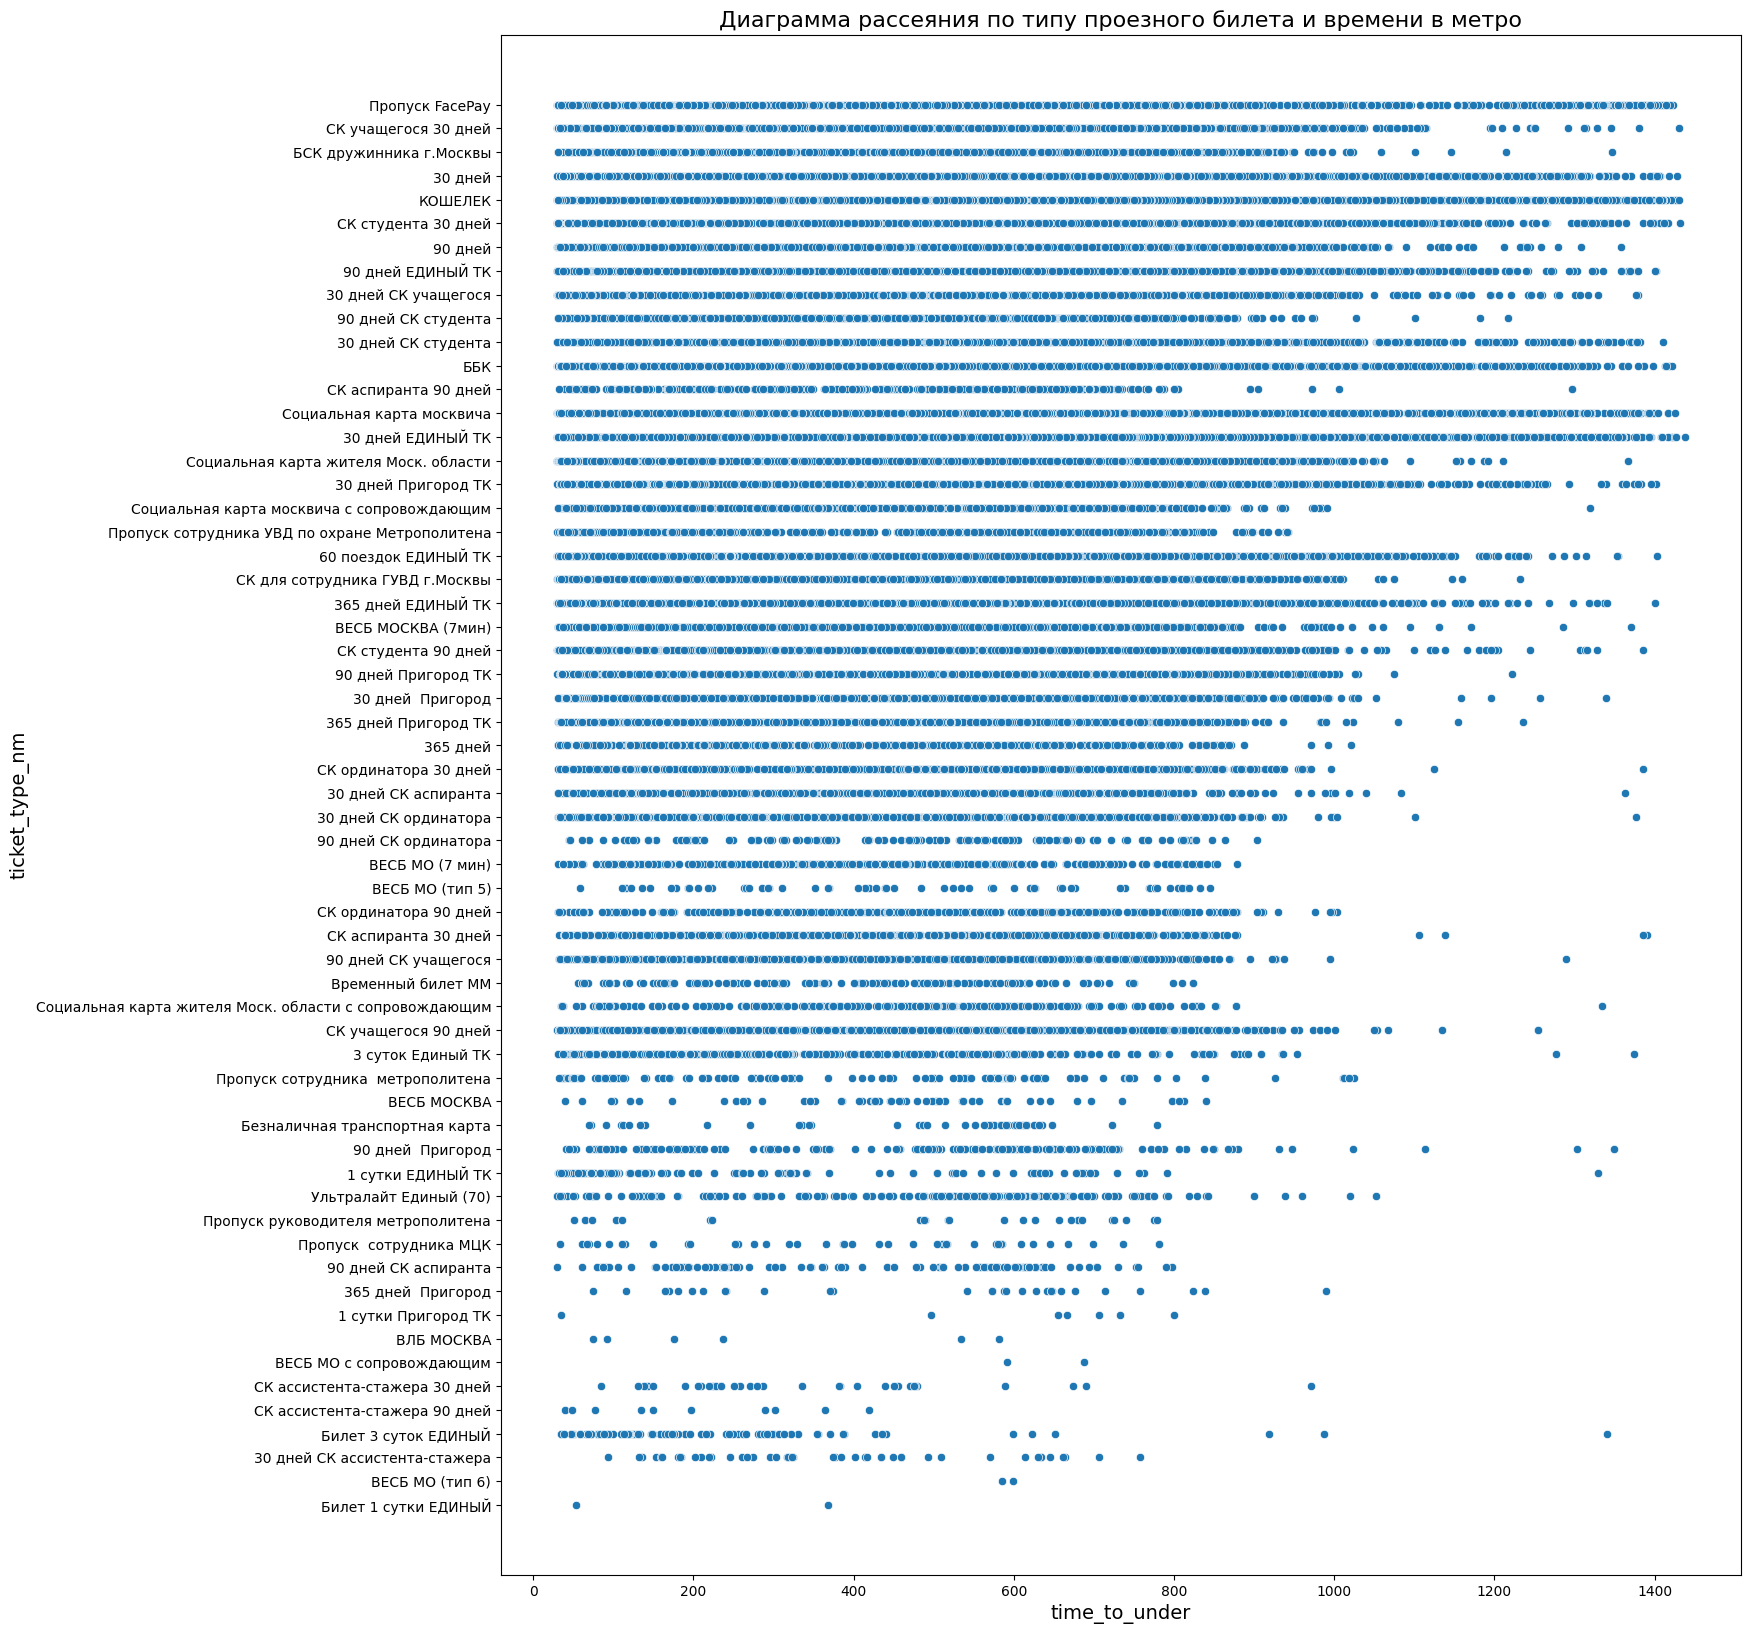

In [ ]:
# Диаграмма рассеяния по типу проезного билета и времени в метро
plt.figure(figsize=(16,20))
plt.title('Диаграмма рассеяния по типу проезного билета и времени в метро', fontsize=16)
plt.xlabel('time_to_under', fontsize=14)
plt.ylabel('ticket_type_nm', fontsize=14)
sns.scatterplot(x="time_to_under", y='ticket_type_nm', data=df);

Посмотрим на распределение двух основных величин

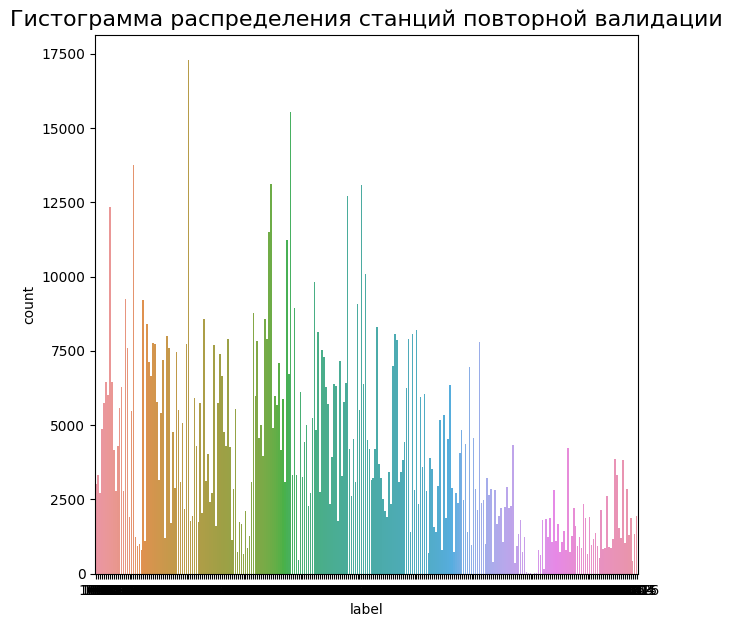

In [ ]:
# Гистограмма распределения станций повторной валидации = частота встречаемости
plt.figure(figsize=(7,7))
plt.title('Гистограмма распределения станций повторной валидации', fontsize=16)
sns.countplot(data=df, x='label');

<Axes: >

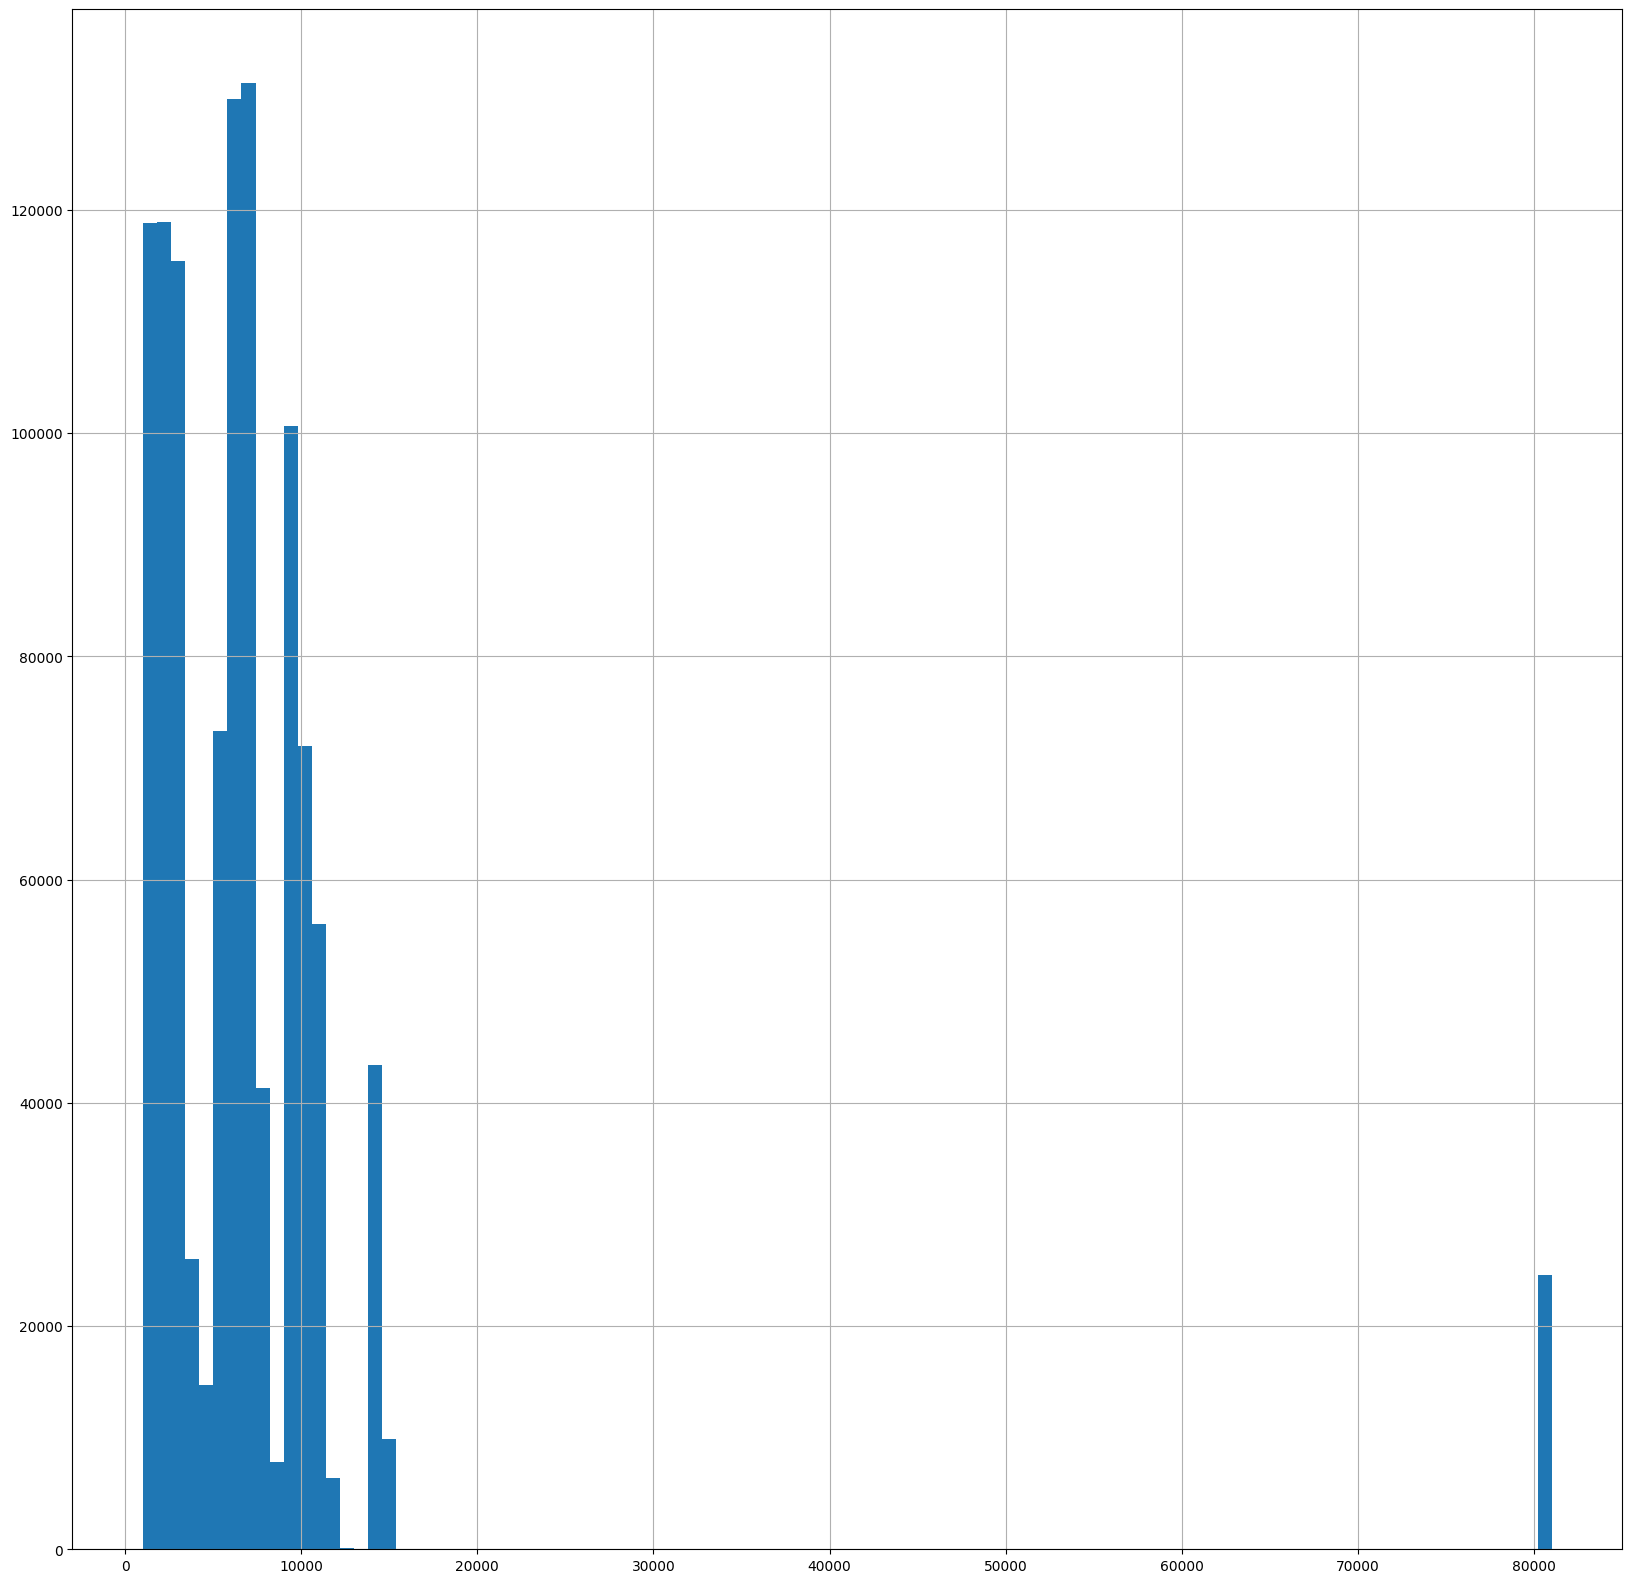

In [ ]:
# Визуализация labels для классификации времени прибытия на станцию (менее детальная)
df["label"].hist(bins = 100)

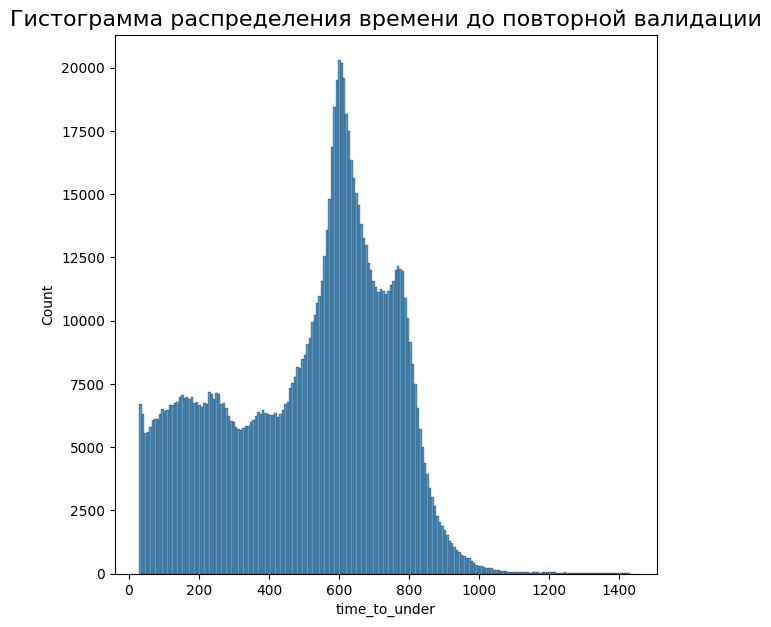

In [ ]:
# Гистограмма распределения времени до повторной валидации
plt.figure(figsize=(7,7))
plt.title('Гистограмма распределения времени до повторной валидации', fontsize=16)
sns.histplot(data=df, x='time_to_under');


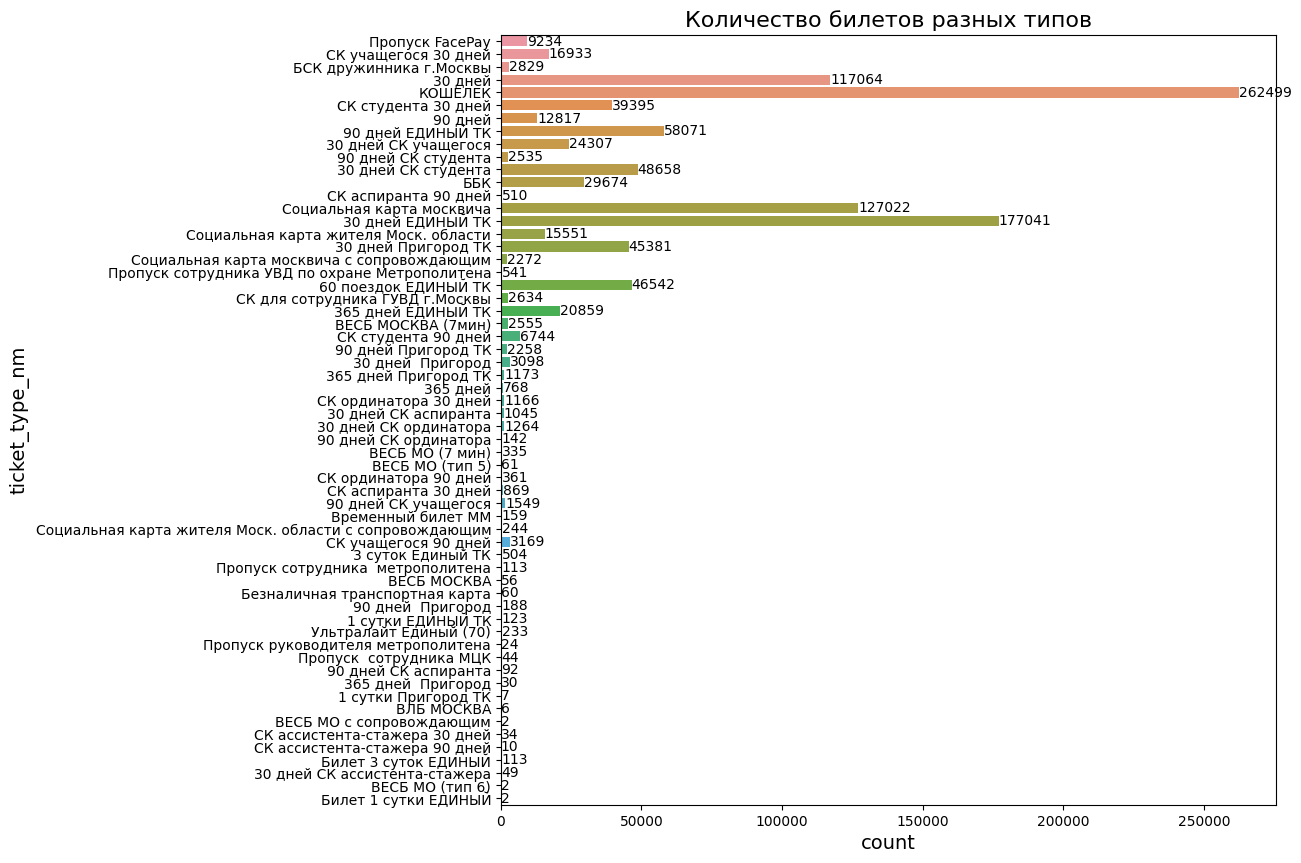

In [ ]:
# Количество билетов разных типов
plt.figure(figsize=(10,10))
plt.title('Количество билетов разных типов', fontsize=16)
plt.xlabel('ticket_type_nm', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax = sns.countplot(y=df['ticket_type_nm'])
for container in ax.containers:
    ax.bar_label(container);

<ipython-input-68-d8aa4ee56ab4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


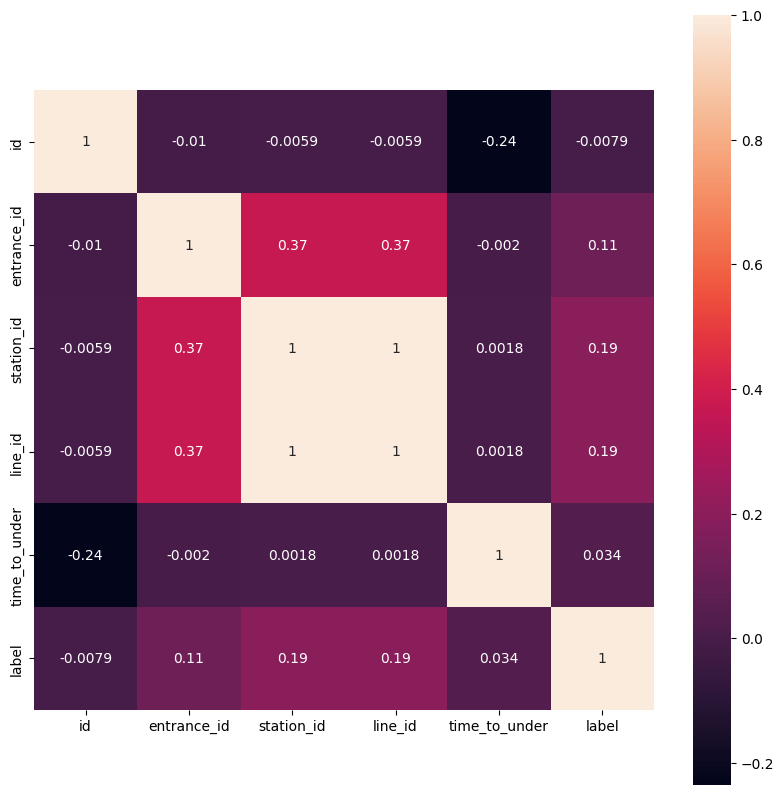

In [ ]:
# Хитмап
plt.rcParams['figure.figsize']=(10,10)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

Вывод:
- Классы "label" разбалансированы
- Признаки между собой коррелируют -> требуется генерация новых признаков, наиболее коррелирующих с таргентом. Это нужно в особенности для классификации станций второй валидации.
- Каждый билет ездил примерно 3,25 раза, значит на основании ticket_id можно создавать новые признаки
- Большая часть билетов, у которых между валидациями 5 - 11ч. Это учащиеся и работающие люди, постоянно проживающие в городе.
- Из второго датасета можно взять данные о средней и максимальной продолжительности маршрута от станции начала перевозки


# Генерация признаков

## Дни недели 'day_of_week'

In [ ]:
# Превращаем колонку pass_dttm в индекс
df.index = pd.to_datetime(df.pass_dttm, format='%Y-%m-%d %H:%M:%S')
# Посмотрим период за который предоставлены данные в датасете
print(f'Период предоставления данных с {df.index.min()} по {df.index.max()}')

# Удаляем колонку pass_dttm из датафрейма
df.drop('pass_dttm', axis=1, inplace=True)
# Сгенерируем признак дней недели (0-понедельник, 1-вторник, 2-среда и т.д)
df['day_of_week'] = df.index.weekday
df['day_of_week'].astype('category')

Период предоставления данных с 2022-09-12 05:00:13 по 2022-09-19 04:10:42


pass_dttm
2022-09-12 05:00:13    0
2022-09-12 05:00:54    0
2022-09-12 05:00:55    0
2022-09-12 05:01:13    0
2022-09-12 05:02:55    0
                      ..
2022-09-19 02:54:50    0
2022-09-19 03:06:02    0
2022-09-19 03:17:00    0
2022-09-19 03:23:30    0
2022-09-19 04:10:42    0
Name: day_of_week, Length: 1091021, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

<Axes: title={'center': 'Диаграмма посещений метро за каждый день'}, xlabel='day_of_week', ylabel='count'>

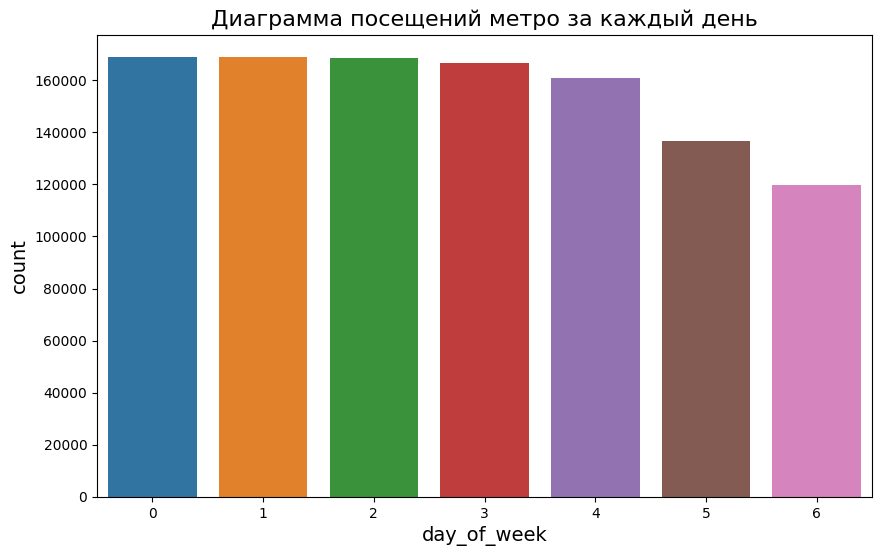

In [ ]:
# Диаграмма посещений метро за каждый день
plt.figure(figsize=(10,6))
plt.title('Диаграмма посещений метро за каждый день', fontsize=16)
plt.xlabel('day_of_week', fontsize=14)
plt.ylabel('count', fontsize=14)
sns.countplot(x=df['day_of_week'])

## Количество часов между валидациями 'time_between_validations'

In [ ]:
# Генерируем признак времени между валидациями в часах
df['time_between_validations'] = df.time_to_under.apply(lambda x: x // 60)
df['time_between_validations'].astype('category')

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


pass_dttm
2022-09-12 05:00:13     3.0
2022-09-12 05:00:54    10.0
2022-09-12 05:00:55    14.0
2022-09-12 05:01:13    17.0
2022-09-12 05:02:55    16.0
                       ... 
2022-09-19 02:54:50     2.0
2022-09-19 03:06:02     0.0
2022-09-19 03:17:00     1.0
2022-09-19 03:23:30     0.0
2022-09-19 04:10:42     0.0
Name: time_between_validations, Length: 1091021, dtype: category
Categories (24, float64): [0.0, 1.0, 2.0, 3.0, ..., 20.0, 21.0, 22.0, 23.0]

## Час, в котором произошла первая валидация 'entrance_hour'

In [ ]:
# Сгенерируем признак, который отрзит час, в котором случилась 1я валидация
df['entrance_hour'] = df.index.hour
df['entrance_hour'].astype('category')

pass_dttm
2022-09-12 05:00:13    5
2022-09-12 05:00:54    5
2022-09-12 05:00:55    5
2022-09-12 05:01:13    5
2022-09-12 05:02:55    5
                      ..
2022-09-19 02:54:50    2
2022-09-19 03:06:02    3
2022-09-19 03:17:00    3
2022-09-19 03:23:30    3
2022-09-19 04:10:42    4
Name: entrance_hour, Length: 1091021, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

<Axes: title={'center': 'Количество пассажиров совершивших поездки в соответствующие часы'}, xlabel='entrance_hour', ylabel='count'>

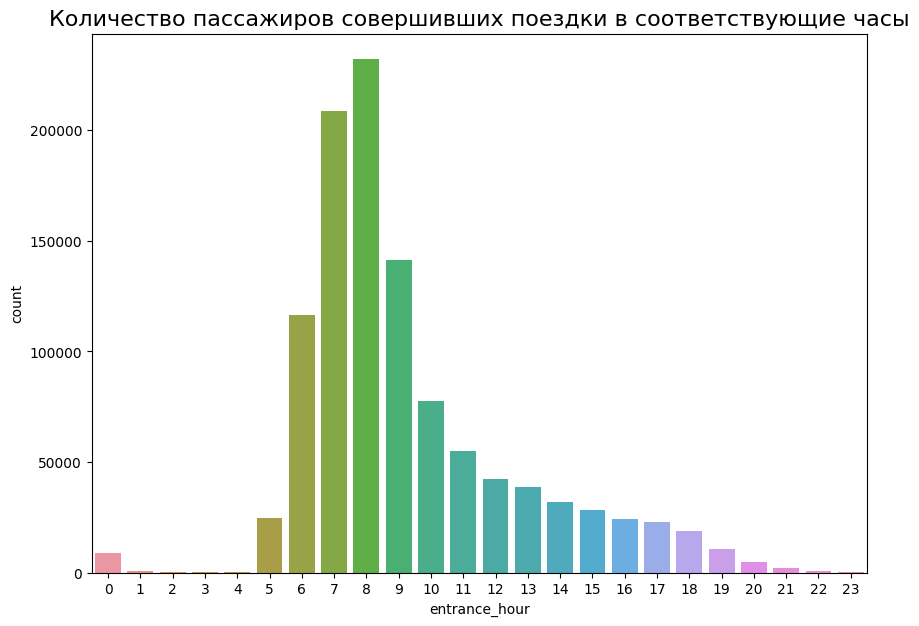

In [ ]:
# Количество пассажиров совершивших поездки в соответствующие часы
plt.figure(figsize=(10,7))
plt.title('Количество пассажиров совершивших поездки в соответствующие часы', fontsize=16)
sns.countplot(x=df['entrance_hour'])

## Час, в котором произошла вторая валидация 'second_validation'

In [ ]:
# Определим столбцы, сумма которых даст время второй валидации
sum_cols = ['entrance_hour', 'time_between_validations']

# Суммируем час входа в метро и время между валидациями
df['second_validation'] = df[sum_cols].sum(axis= 1)
df['second_validation'].astype('category')

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


pass_dttm
2022-09-12 05:00:13     8.0
2022-09-12 05:00:54    15.0
2022-09-12 05:00:55    19.0
2022-09-12 05:01:13    22.0
2022-09-12 05:02:55    21.0
                       ... 
2022-09-19 02:54:50     4.0
2022-09-19 03:06:02     3.0
2022-09-19 03:17:00     4.0
2022-09-19 03:23:30     3.0
2022-09-19 04:10:42     4.0
Name: second_validation, Length: 1091021, dtype: category
Categories (24, float64): [0.0, 1.0, 2.0, 3.0, ..., 20.0, 21.0, 22.0, 23.0]

<Axes: title={'center': 'Количество пассажиров совершивших поездки в соответствующие часы'}, xlabel='second_validation', ylabel='count'>

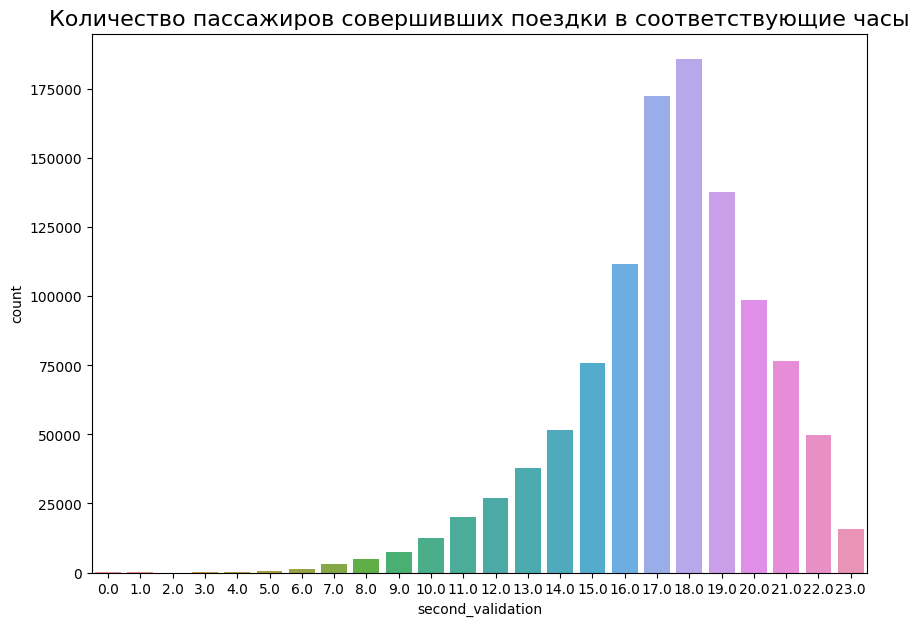

In [ ]:
# Количество пассажиров совершивших поездки в соответствующие часы
plt.figure(figsize=(10,7))
plt.title('Количество пассажиров совершивших поездки в соответствующие часы', fontsize=16)
sns.countplot(x=df['second_validation'])

## Категория пассажира 'pass_category'

In [ ]:
# Генерируем новый признак категория пассажира = всего 6 категорий на основе типа билета
# Создадим списки с категориями пассажиров по типу билета
students = ['СК учащегося 30 дней', 'СК студента 30 дней', '30 дней СК учащегося', '90 дней СК студента', '30 дней СК студента', 'СК студента 90 дней', '30 дней СК аспиранта', 'СК аспиранта 30 дней', '90 дней СК учащегося', 'СК учащегося 90 дней', '90 дней СК аспиранта', 'СК аспиранта 90 дней', 'СК ординатора 30 дней', '30 дней СК ординатора',  '90 дней СК ординатора', 'СК ординатора 90 дней']
military_police = ['БСК дружинника г.Москвы','Пропуск сотрудника УВД по охране Метрополитена','ВЕСБ МО (7 мин)','СК для сотрудника ГУВД г.Москвы','ВЕСБ МО (тип 5)','ВЕСБ МОСКВА (7мин)','ВЕСБ МОСКВА','ВЕСБ МО с сопровождающим','ВЕСБ МО (тип 6)']
social_pass = ['Социальная карта москвича', 'Социальная карта жителя Моск. области с сопровождающим', 'Социальная карта жителя Моск. области', 'Социальная карта москвича с сопровождающим', 'Безналичная транспортная карта', 'ВЛБ МОСКВА']
citizen = ['365 дней ЕДИНЫЙ ТК','365 дней', '30 дней', '90 дней', '90 дней ЕДИНЫЙ ТК', '60 поездок ЕДИНЫЙ ТК', '90 дней Пригород ТК', '30 дней  Пригород', '365 дней Пригород ТК', '30 дней Пригород ТК', '90 дней  Пригород', '365 дней  Пригород', '30 дней ЕДИНЫЙ ТК', 'Пропуск FacePay', 'КОШЕЛЕК', 'ББК']
short_trip_pass = ['Временный билет ММ', '1 сутки ЕДИНЫЙ ТК', 'Ультралайт Единый (70)', '3 суток Единый ТК', '1 сутки Пригород ТК', 'Билет 3 суток ЕДИНЫЙ', 'Билет 1 сутки ЕДИНЫЙ']
stuff = ['Пропуск сотрудника  метрополитена', 'Пропуск руководителя метрополитена', 'Пропуск  сотрудника МЦК', '30 дней СК ассистента-стажера', 'СК ассистента-стажера 30 дней', 'СК ассистента-стажера 90 дней']
# Добавим значение категории в новую колонку 'pass_category'
df.loc[(df['ticket_type_nm'].isin(students)), 'pass_category'] = 'students_aspirants_ordinators' # категория - студенты, учащиеся, аспиранты
df.loc[(df['ticket_type_nm'].isin(military_police)), 'pass_category'] = 'military_police'        # категория - военные, охрана
df.loc[(df['ticket_type_nm'].isin(social_pass)), 'pass_category'] = 'social_citizens'            # категория - социальные льготники
df.loc[(df['ticket_type_nm'].isin(citizen)), 'pass_category'] = 'residents'                      # категория - обычные горожане
df.loc[(df['ticket_type_nm'].isin(short_trip_pass)), 'pass_category'] = 'short_trip'             # категория - разовые или краткосрочные пассажиры
df.loc[(df['ticket_type_nm'].isin(stuff)), 'pass_category'] = 'metro_stuff'                      # категория - персонал метрополитена
df['pass_category'][:3]
df.pass_category.astype('category')

pass_dttm
2022-09-12 05:00:13                        residents
2022-09-12 05:00:54    students_aspirants_ordinators
2022-09-12 05:00:55                  military_police
2022-09-12 05:01:13                        residents
2022-09-12 05:02:55                        residents
                                   ...              
2022-09-19 02:54:50                        residents
2022-09-19 03:06:02                        residents
2022-09-19 03:17:00                        residents
2022-09-19 03:23:30                        residents
2022-09-19 04:10:42                        residents
Name: pass_category, Length: 1091021, dtype: category
Categories (6, object): ['metro_stuff', 'military_police', 'residents', 'short_trip',
                         'social_citizens', 'students_aspirants_ordinators']

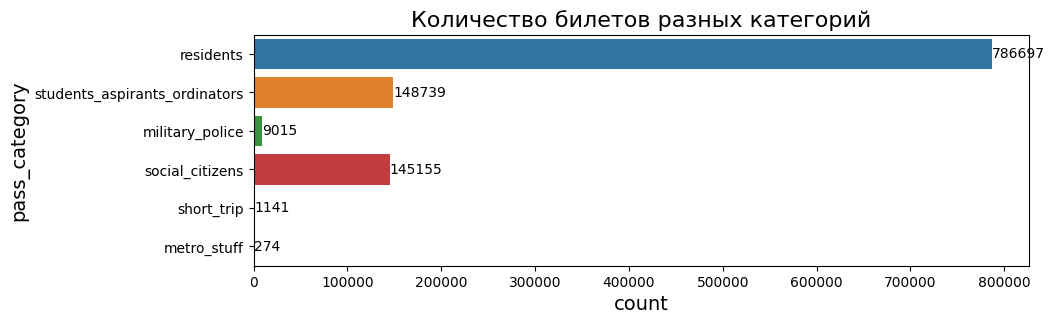

In [ ]:
# Количество билетов разных категорий
plt.figure(figsize=(10,3))
plt.title('Количество билетов разных категорий', fontsize=16)
plt.xlabel('ticket_type_nm', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax = sns.countplot(y=df['pass_category'])
for container in ax.containers:
    ax.bar_label(container);

## Фичи по ticket_id

Фичи по ticket_id :

- стандартное отклонение по дню недели ('day_of_week_std'),

- дисперсия по дню недели ('day_of_week_var'),

- стандартное отклонение по времени входа в метро ('entrance_hour_std'),

- дисперсия по времени входа в метро ('entrance_hour_var'),

- стандартное отклонение по времени второй валидации ('second_validation_std'),

- дисперсия по времени второй валидации ('second_validation_var'),

- количество посещенных станций ('station_id_count'),

- количество уникальных станций ('station_id_nunique')

In [ ]:
df[['ticket_type_nm', 'pass_category']].head(5)

,ticket_type_nm,pass_category
pass_dttm,,
2022-09-12 05:00:13,Пропуск FacePay,residents
2022-09-12 05:00:54,СК учащегося 30 дней,students_aspirants_ordinators
2022-09-12 05:00:55,БСК дружинника г.Москвы,military_police
2022-09-12 05:01:13,30 дней,residents
2022-09-12 05:02:55,КОШЕЛЕК,residents


In [ ]:
# Сколько в среднем поездок делал пассажир
print(df.ticket_id.value_counts().mean())
# Сколько уникальных значений в ticket_id столбце
print(df.ticket_id.nunique())

3.2516056542873577
335533


In [ ]:
# Применим метод .pivot_table(), который позволяет быстро преобразовать DataFrame в сводную таблицу и сгенерировать новые признаки по ticket_id
ticket_id_features = df.sort_index().pivot_table(index='ticket_id', # выбираем ключ для группировки по индексу
                                                 values=['station_id','day_of_week', 'entrance_hour', 'second_validation'], # столбцы для агрегирования
                                                 aggfunc={'station_id': ['count', 'nunique'], # что делать с повторяющимися значениями
                                                          'entrance_hour': 'mean', 'second_validation':'mean',
                                                          'day_of_week': ['std', 'var'], 'entrance_hour': ['std', 'var'], 'second_validation':['std', 'var']},
                                                 fill_value=0) # заменяем NaN на ноль

In [ ]:
# Заменим наименования столбцов
ticket_id_features.columns = ['day_of_week_std', 'day_of_week_var', 'entrance_hour_std', 'entrance_hour_var', 'second_validation_std', 'second_validation_var', 'station_id_count', 'station_id_nunique']
ticket_id_features.head(3)

,day_of_week_std,day_of_week_var,entrance_hour_std,entrance_hour_var,second_validation_std,second_validation_var,station_id_count,station_id_nunique
ticket_id,,,,,,,,
0000127DEF21FE03B73E7446B1CD950D,2.943920,8.666667,0.500000,0.250000,0.500000,0.250000,4,1
0000384F57624A46FC50B1791DD35375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
0000680906DD9A73E4643DE01195B9FF,2.160247,4.666667,1.133893,1.285714,0.377964,0.142857,7,2


In [ ]:
# Присоединим новые данные к исходному датафрейму
df = df.join(ticket_id_features, on='ticket_id')
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,time_to_under,...,second_validation,pass_category,day_of_week_std,day_of_week_var,entrance_hour_std,entrance_hour_var,second_validation_std,second_validation_var,station_id_count,station_id_nunique
pass_dttm,,,,,,,,,,,,,,,,,,,,,
2022-09-12 05:00:13,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,216.316667,...,8.0,residents,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
2022-09-12 05:00:54,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,648.183333,...,15.0,students_aspirants_ordinators,2.549510,6.500000,4.086563,16.700000,1.303840,1.700000,5,1
2022-09-12 05:00:55,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,865.333333,...,19.0,military_police,2.236068,5.000000,3.577709,12.800000,1.581139,2.500000,5,1
2022-09-12 05:01:13,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,1048.233333,...,22.0,residents,2.316607,5.366667,2.658320,7.066667,0.547723,0.300000,6,2
2022-09-12 05:02:55,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,965.600000,...,21.0,residents,2.629956,6.916667,3.774917,14.250000,0.577350,0.333333,4,1


## Класс станции назначения - 'class'

In [ ]:
# Замена значений в столбце 'label' на числовые, переведем в классы от 0 до 275
label_map = {label: i for i, label in enumerate(df['label'].unique())}

# Отразим значения в столбце 'class_station'
df['class_station'] = df['label'].map(label_map)

# Выведем на экран
print('Количество классов в датафрейме =', df.class_station.nunique(), 'Максимальное значение класса =', df.class_station.max())
print('Словарь классов ', label_map.items())
df.head()


Количество классов в датафрейме = 276 Максимальное значение класса = 275
Словарь классов  dict_items([(8001, 0), (9011, 1), (7022, 2), (2022, 3), (2017, 4), (11012, 5), (15001, 6), (7014, 7), (5007, 8), (6018, 9), (5009, 10), (5008, 11), (3015, 12), (7023, 13), (8003, 14), (11013, 15), (11020, 16), (9022, 17), (1012, 18), (5005, 19), (6001, 20), (8005, 21), (1020, 22), (9012, 23), (3016, 24), (9009, 25), (11003, 26), (10018, 27), (12006, 28), (2016, 29), (3014, 30), (8007, 31), (6022, 32), (6008, 33), (4002, 34), (2008, 35), (1007, 36), (8006, 37), (3011, 38), (11007, 39), (3018, 40), (5003, 41), (1016, 42), (10003, 43), (5011, 44), (7021, 45), (9020, 46), (9021, 47), (8008, 48), (2023, 49), (5001, 50), (3002, 51), (3017, 52), (4004, 53), (7003, 54), (6006, 55), (6023, 56), (7020, 57), (4003, 58), (1005, 59), (7019, 60), (6016, 61), (2024, 62), (1026, 63), (10007, 64), (10022, 65), (4001, 66), (10023, 67), (3001, 68), (2010, 69), (15005, 70), (11006, 71), (12004, 72), (2007, 73), (6014

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,time_to_under,...,pass_category,day_of_week_std,day_of_week_var,entrance_hour_std,entrance_hour_var,second_validation_std,second_validation_var,station_id_count,station_id_nunique,class_station
pass_dttm,,,,,,,,,,,,,,,,,,,,,
2022-09-12 05:00:13,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,216.316667,...,residents,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0
2022-09-12 05:00:54,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,648.183333,...,students_aspirants_ordinators,2.549510,6.500000,4.086563,16.700000,1.303840,1.700000,5,1,1
2022-09-12 05:00:55,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,865.333333,...,military_police,2.236068,5.000000,3.577709,12.800000,1.581139,2.500000,5,1,2
2022-09-12 05:01:13,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,1048.233333,...,residents,2.316607,5.366667,2.658320,7.066667,0.547723,0.300000,6,2,3
2022-09-12 05:02:55,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,965.600000,...,residents,2.629956,6.916667,3.774917,14.250000,0.577350,0.333333,4,1,4


In [ ]:
# Посмотрим на описание классов станций, их теперь от 0 до 275
df['class_station'].describe().apply(lambda x: format(x, 'g'))

count    1.09102e+06
mean         110.021
std          70.9933
min                0
25%               51
50%              102
75%              161
max              275
Name: class_station, dtype: object

## Линия станции назначения - 'line_label'

In [ ]:
line_map = df[['station_id','line_id']]
line_map = dict(line_map.drop_duplicates().sort_values(by='station_id').reset_index(drop=True).to_numpy())
print(len(line_map))
# Отразим значения в столбце 'class_station'
df['line_label'] = df['station_id'].map(line_map)
df.head()

276


,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,time_to_under,...,day_of_week_std,day_of_week_var,entrance_hour_std,entrance_hour_var,second_validation_std,second_validation_var,station_id_count,station_id_nunique,class_station,line_label
pass_dttm,,,,,,,,,,,,,,,,,,,,,
2022-09-12 05:00:13,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,216.316667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,11
2022-09-12 05:00:54,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,648.183333,...,2.549510,6.500000,4.086563,16.700000,1.303840,1.700000,5,1,1,2
2022-09-12 05:00:55,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,865.333333,...,2.236068,5.000000,3.577709,12.800000,1.581139,2.500000,5,1,2,2
2022-09-12 05:01:13,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,1048.233333,...,2.316607,5.366667,2.658320,7.066667,0.547723,0.300000,6,2,3,2
2022-09-12 05:02:55,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,965.600000,...,2.629956,6.916667,3.774917,14.250000,0.577350,0.333333,4,1,4,2


## Отношение станции конца маршрута к началу, делим значения - 'div_stations_2'

In [ ]:
df['div_stations_2'] = df['label'] / df['station_id']
df['div_stations_2']

pass_dttm
2022-09-12 05:00:13    0.726901
2022-09-12 05:00:54    4.492024
2022-09-12 05:00:55    3.500499
2022-09-12 05:01:13    1.007976
2022-09-12 05:02:55    1.005484
                         ...   
2022-09-19 02:54:50    1.000000
2022-09-19 03:06:02    1.000000
2022-09-19 03:17:00    1.000000
2022-09-19 03:23:30    1.000000
2022-09-19 04:10:42    1.000000
Name: div_stations_2, Length: 1091021, dtype: float64

## Выходной или рабочий день - 'day_type'

In [ ]:
df['day_type'] = df.day_of_week.apply(lambda x: x < 5).astype(int)
df['day_type'].unique()

array([1, 0])

## Средняя и максимальная продолжительность маршрута от станции начала перевозки - 'mean', 'max'

In [ ]:
start_station_route_dur = df_subway.groupby('start_station_id').route_dur.describe().reset_index()
start_station_route_dur.head()

,start_station_id,count,mean,std,min,25%,50%,75%,max
0,1001,11216.0,37.943962,12.588374,0.0,29.0575,36.79,45.1625,74.15
1,1002,9345.0,52.041404,13.026007,0.0,42.4600,51.46,60.4600,89.30
2,1003,9244.0,47.391568,13.487361,0.0,37.5775,46.11,54.9325,85.30
3,1004,10951.0,40.178607,12.136876,0.0,31.9600,39.60,47.4800,76.48
4,1005,10944.0,41.852187,12.181890,0.0,33.5900,41.25,49.2200,78.15


In [ ]:
start_station_route_dur = start_station_route_dur[(start_station_route_dur.start_station_id.isin(df['label']))]
start_station_route_dur.start_station_id.nunique()

276

In [ ]:
# Объединим обе таблицы, сначала создадим общий столбец, по которому зальем днные
df['start_station_id'] = df['label']
# Объединение
df = pd.merge(df, start_station_route_dur[['start_station_id', 'mean', 'min', 'max']],
                  on='start_station_id', how='right')
# Выведем на экран
df.head(5)


,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,time_to_under,...,station_id_count,station_id_nunique,class_station,line_label,div_stations_2,day_type,start_station_id,mean,min,max
0,621,AA0833009F2BA1EFC2A2657B04EBAAA8,30 дней,52,Фрунзенская,1019,Фрунзенская,1,Сокольническая,858.116667,...,5,2,206,1,0.983317,1,1002,52.041404,0.0,89.3
1,735,2D0284070C553993757011411F75A838,КОШЕЛЕК,2458,Мичуринский проспект БКЛ (Второй),11017,Мичуринский проспект,11,Большая кольцевая,528.850000,...,3,3,206,11,0.090950,1,1002,52.041404,0.0,89.3
2,1053,BBDE7A8E2B57381B9CEDBEF9DDFBABE8,30 дней ЕДИНЫЙ ТК,2255,Ольховая,1025,Ольховая,1,Сокольническая,823.716667,...,7,1,206,1,0.977561,1,1002,52.041404,0.0,89.3
3,1345,F49766B2698D89AB65E919FD437DEF88,Пропуск сотрудника УВД по охране Метрополитена,282,Беляево (Южный),6004,Беляево,6,Калужско-Рижская,597.433333,...,4,2,206,6,0.166889,1,1002,52.041404,0.0,89.3
4,1482,10D760C14CCC45EE1DC195B02BB40205,30 дней ЕДИНЫЙ ТК,2033,Кунцевская (А-П) (Восток),3007,Кунцевская,3,Арбатско-Покровская,610.483333,...,4,1,206,3,0.333222,1,1002,52.041404,0.0,89.3


## Удаление ненужных признаков и формирование нового датафрейма df_new с новыми признаками

In [ ]:
import gc
gc.collect()

28222

In [ ]:
df.columns

Index(['id', 'ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm',
       'station_id', 'station_nm', 'line_id', 'line_nm', 'time_to_under',
       'label', 'day_of_week', 'time_between_validations', 'entrance_hour',
       'second_validation', 'pass_category', 'day_of_week_std',
       'day_of_week_var', 'entrance_hour_std', 'entrance_hour_var',
       'second_validation_std', 'second_validation_var', 'station_id_count',
       'station_id_nunique', 'class_station', 'line_label', 'div_stations_2',
       'day_type', 'start_station_id', 'mean', 'min', 'max'],
      dtype='object')

<ipython-input-93-b99553007374>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


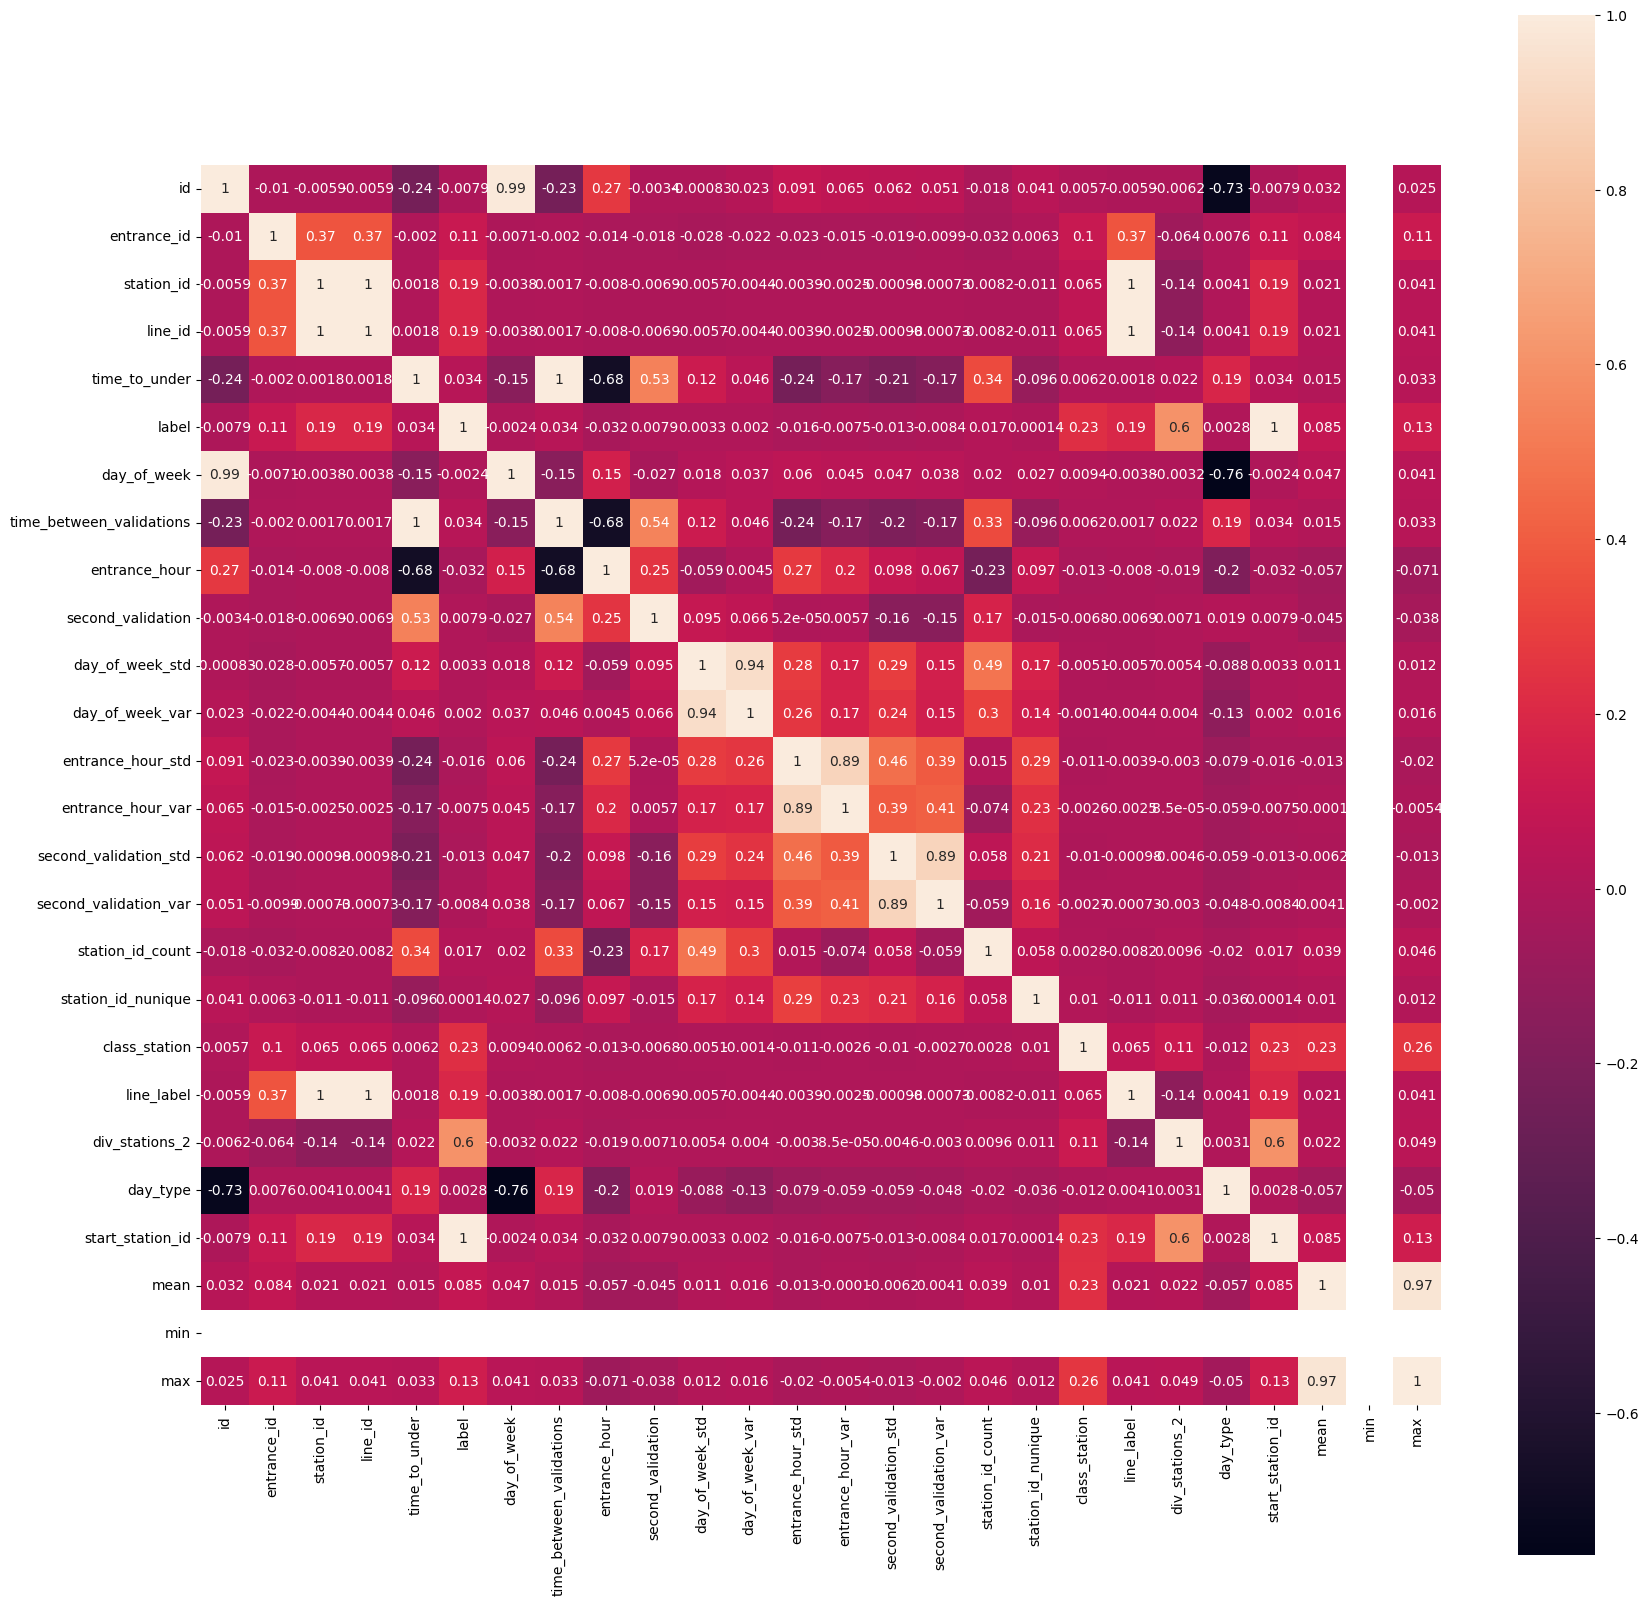

In [ ]:
# Хитмап
plt.rcParams['figure.figsize']=(20,20)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

Удалим ненужные признаки:

'entrance_id',	'entrance_nm', 'station_nm',	'line_id',	'line_nm', 'second_validation_var', 'entrance_hour_var', 'min'
      

In [ ]:
# Сохраним одну копию для бэкапа, вторую для дальнейшей работы
df_backup = df.copy()
df_new = df.copy()

In [ ]:
df_new.drop(['entrance_id',	'entrance_nm', 'station_nm',	'line_id',	'line_nm', 'second_validation_var', 'entrance_hour_var', 'min'], axis=1, inplace=True)
df_new.head(3)

,id,ticket_id,ticket_type_nm,station_id,time_to_under,label,day_of_week,time_between_validations,entrance_hour,second_validation,...,second_validation_std,station_id_count,station_id_nunique,class_station,line_label,div_stations_2,day_type,start_station_id,mean,max
0,621,AA0833009F2BA1EFC2A2657B04EBAAA8,30 дней,1019,858.116667,1002,0,14.0,5,19.0,...,1.949359,5,2,206,1,0.983317,1,1002,52.041404,89.3
1,735,2D0284070C553993757011411F75A838,КОШЕЛЕК,11017,528.850000,1002,0,8.0,5,13.0,...,5.033223,3,3,206,11,0.090950,1,1002,52.041404,89.3
2,1053,BBDE7A8E2B57381B9CEDBEF9DDFBABE8,30 дней ЕДИНЫЙ ТК,1025,823.716667,1002,0,13.0,5,18.0,...,0.000000,7,1,206,1,0.977561,1,1002,52.041404,89.3


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091021 entries, 0 to 1091020
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1091021 non-null  int64  
 1   ticket_id                 1091021 non-null  object 
 2   ticket_type_nm            1091021 non-null  object 
 3   station_id                1091021 non-null  int64  
 4   time_to_under             1091021 non-null  float64
 5   label                     1091021 non-null  int64  
 6   day_of_week               1091021 non-null  int64  
 7   time_between_validations  1091021 non-null  float64
 8   entrance_hour             1091021 non-null  int64  
 9   second_validation         1091021 non-null  float64
 10  pass_category             1091021 non-null  object 
 11  day_of_week_std           1091021 non-null  float64
 12  day_of_week_var           1091021 non-null  float64
 13  entrance_hour_std         1

In [ ]:
# Сохраним новый датасет на google диск
df_new.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/df_new_v2.csv', index=True, sep=",", line_terminator='\n')


<ipython-input-99-0e3d14146d81>:2: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  df_new.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/df_new_v2.csv', index=True, sep=",", line_terminator='\n')


In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/Базы/Metro/Datasets/df_new_v2.csv')

<ipython-input-102-210d453aef6a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr()


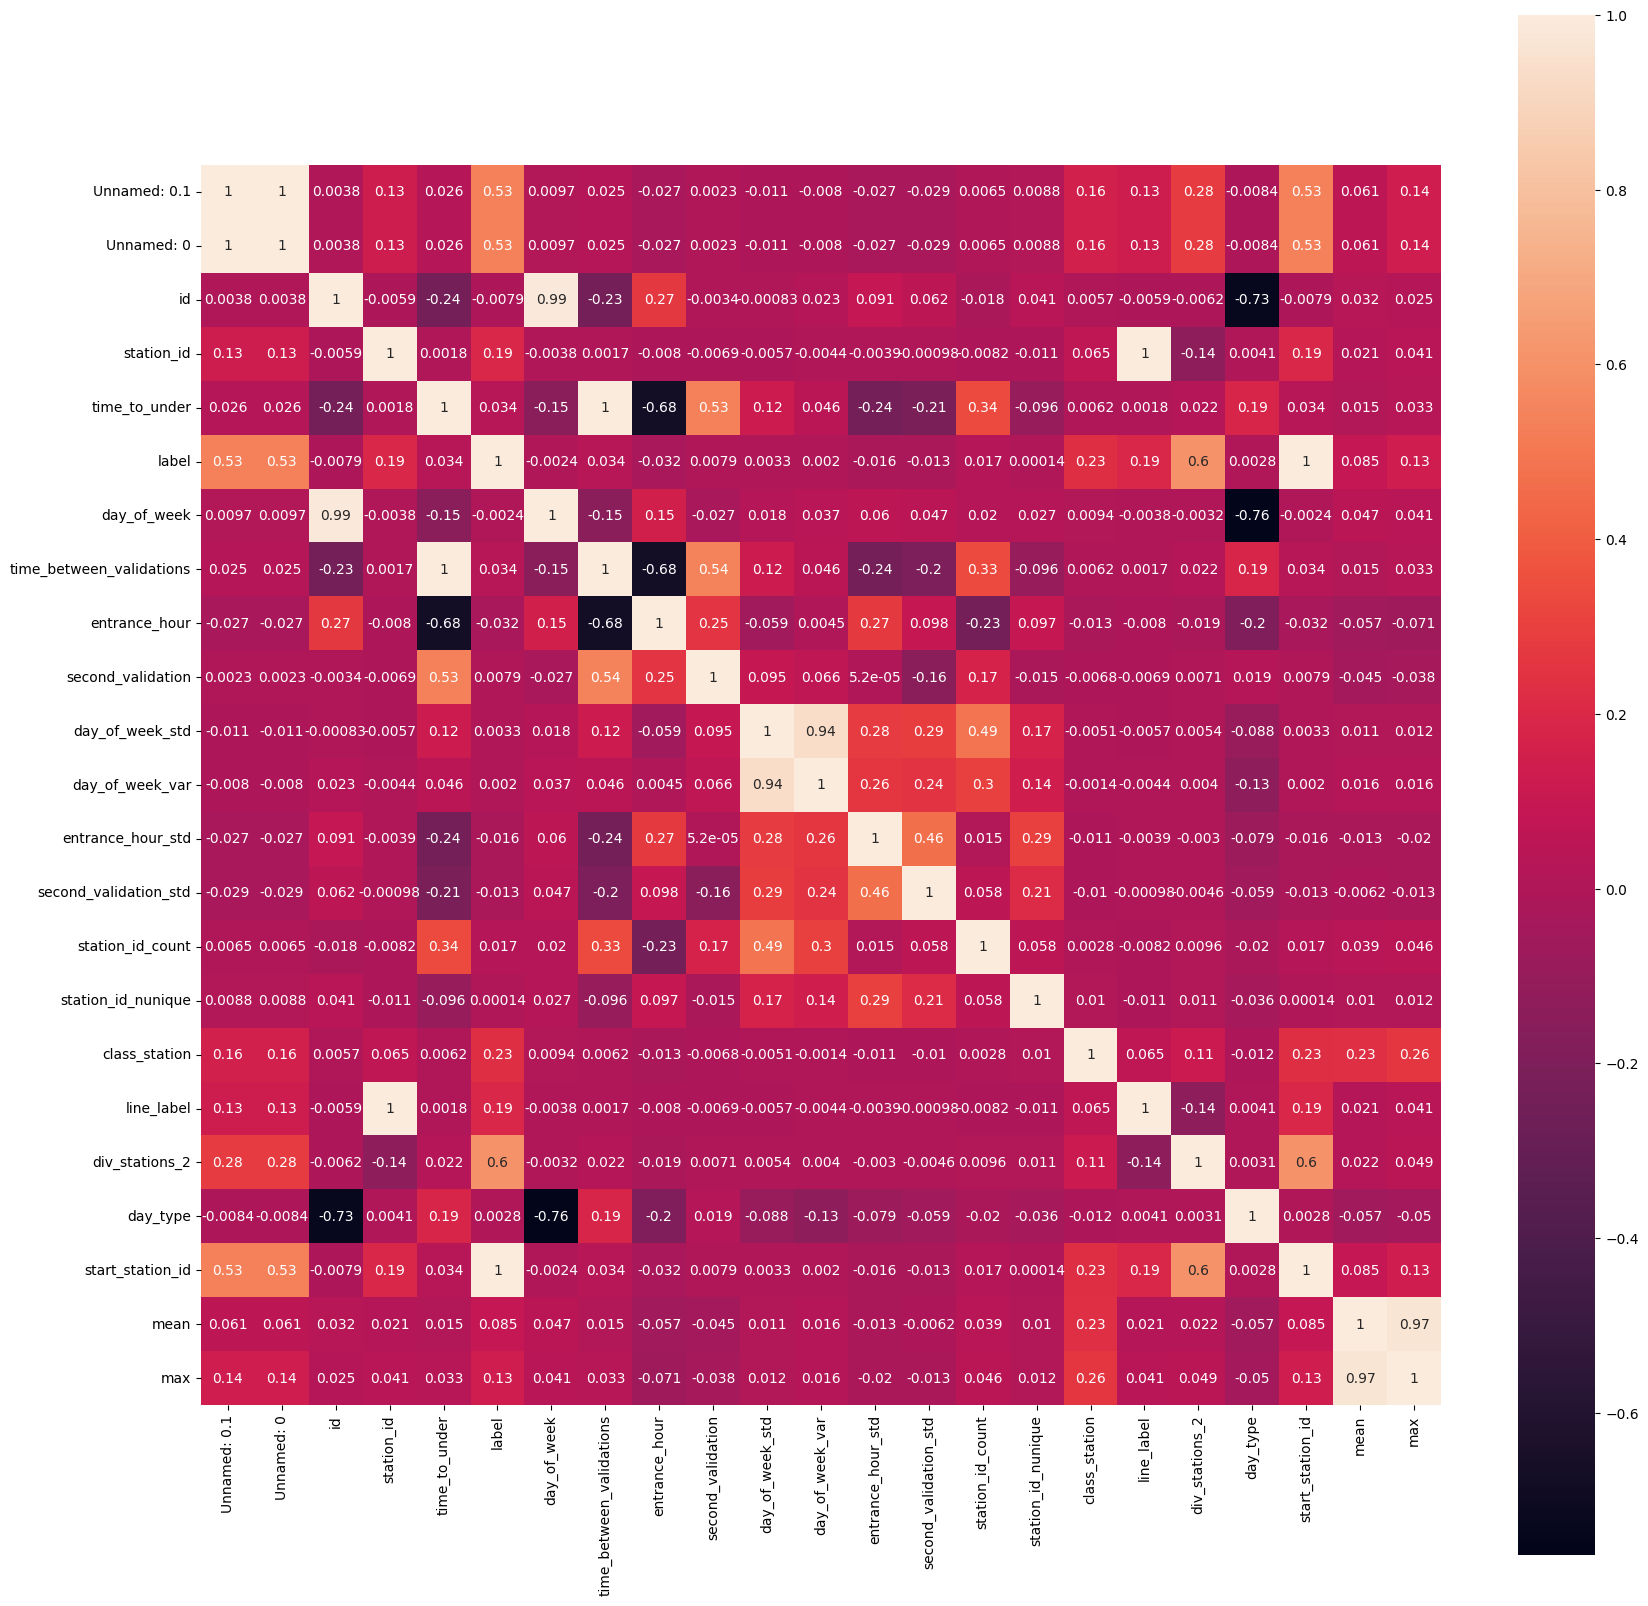

In [ ]:
# Хитмап нового датасета
plt.rcParams['figure.figsize']=(20,20)

corr = df_new.corr()
g = sns.heatmap(corr, square = True, annot=True)

# Разделение датасета

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Базы/Metro/Datasets/df_new_v2.csv')

In [ ]:
cat_col = ['ticket_id', 'ticket_type_nm', 'pass_category', ]

In [ ]:
# Перевод в категории столбец датафрейма
le = LabelEncoder()

data['ticket_id'] = le.fit_transform(data['ticket_id']) # закодровали в категории столбец 'ticket_id'
data['ticket_type_nm'] = le.fit_transform(data['ticket_type_nm']) # закодровали в категории столбец 'ticket_type_nm'
data['pass_category'] = le.fit_transform(data['pass_category']) # закодровали в категории столбец 'pass_category'

print(data[cat_col].head(10))                         # визуализируем результат
print('Всего категорий в столбце ticket_type_nm = ', data['ticket_id'].nunique())
print('Всего категорий в столбце ticket_type_nm = ', data['ticket_type_nm'].nunique())
print('Всего категорий в столбце pass_category = ', data['pass_category'].nunique())

   ticket_id  ticket_type_nm  pass_category
0     223327               3              2
1      58899              38              2
2     246324               5              2
3     320602              43              1
4      22097               5              2
5     226390               3              2
6     210546               5              2
7     272332              38              2
8     314318               5              2
9       8747               5              2
Всего категорий в столбце ticket_type_nm =  335533
Всего категорий в столбце ticket_type_nm =  60
Всего категорий в столбце pass_category =  6


## Датасет для классификации. Разделение на обучающую и тестовую выборки

In [ ]:
# Отделяем метки от признаков
target_col_clf = 'label'
X = data.loc[:, data.columns != target_col_clf]
y = data.loc[:, target_col_clf]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872816, 25), (218205, 25), (872816,), (218205,))

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/datasets_df_clf/X_train_clf_df.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/datasets_df_clf/X_test_clf_df.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/datasets_df_clf/Y_train_clf_df.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/datasets_df_clf/Y_test_clf_df.csv', index=False)

## Датасет для регрессии

In [ ]:
# Отделяем метки от признаков
target_col_reg = 'time_to_under'
X = data.loc[:, data.columns != target_col_reg]
y = data.loc[:, target_col_reg]

In [ ]:
X_train_regdf, X_test_regdf, y_train_regdf, y_test_regdf = train_test_split(X, y,
                                                    test_size=0.20)
X_train_regdf.shape, X_test_regdf.shape, y_train_regdf.shape, y_test_regdf.shape

((872816, 25), (218205, 25), (872816,), (218205,))

In [ ]:
X_train_regdf.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/datasets_df_clf/X_train_reg_df.csv', index=False)
X_test_regdf.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/datasets_df_clf/X_test_reg_df.csv', index=False)
y_train_regdf.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/datasets_df_clf/Y_train_reg_df.csv', index=False)
y_test_regdf.to_csv('/content/drive/MyDrive/Базы/Metro/Datasets/datasets_df_clf/Y_test_reg_df.csv', index=False)